<a href="https://colab.research.google.com/github/Davron030901/OpenCv/blob/main/4_Drawing_on_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Drawing images and shapes using OpenCV**

Firsty, let's import OpenCV and numpy and define our imshow function

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
import torch

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Let's start off my making a blank square canvas

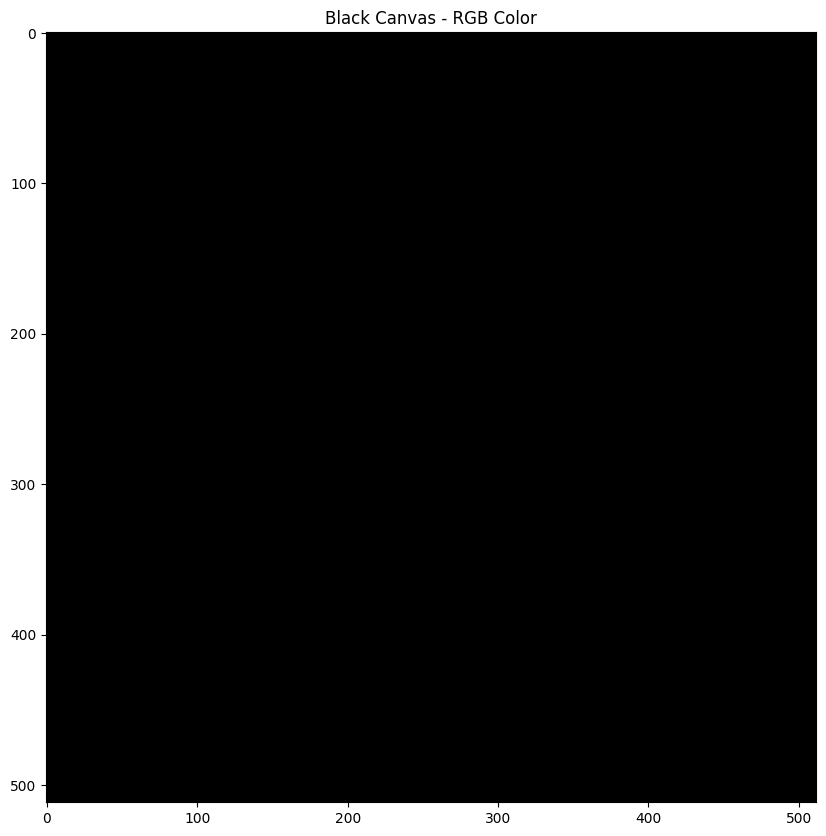

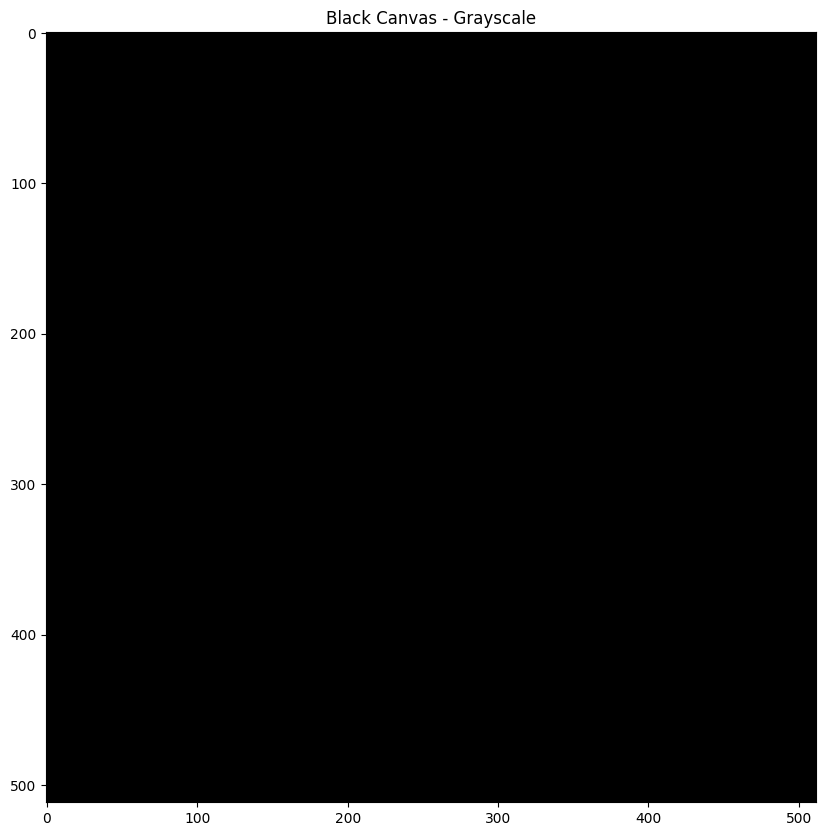

In [ ]:
# Create a black image using numpy to create and array of black
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white? grayscale
image_gray = np.zeros((512,512), np.uint8)

# Black would be the same as a greyscale or color image (same for white)
imshow("Black Canvas - RGB Color", image)
imshow("Black Canvas - Grayscale", image_gray)

### **Let's draw a line over our black square**

```cv2.line(image, starting cordinates, ending cordinates, color, thickness)```

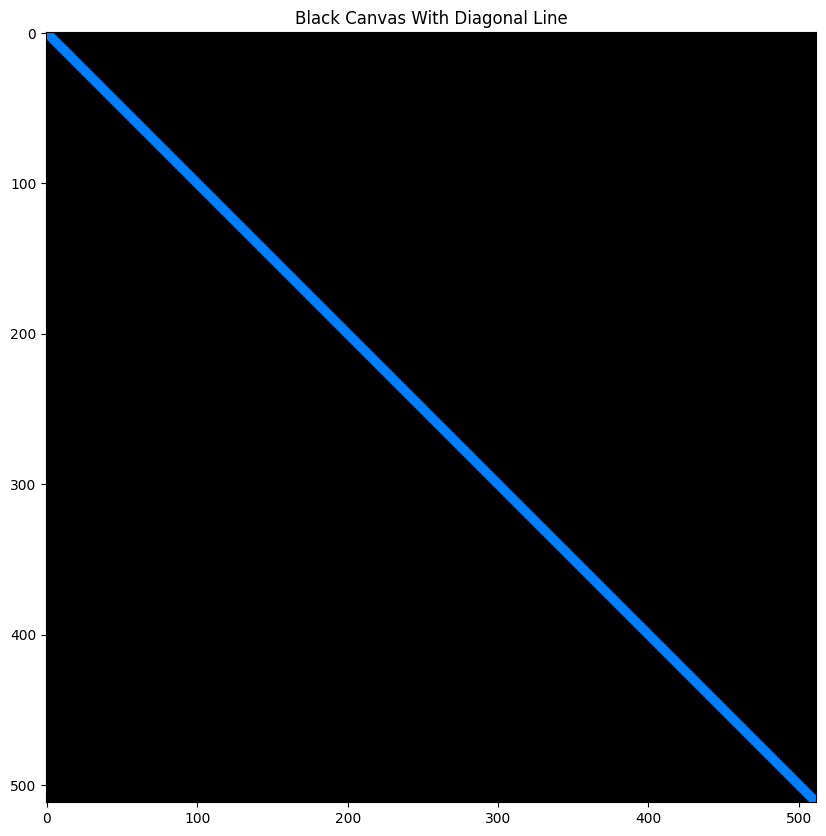

In [ ]:
# Note this is an inplace operation, meaning it changes the input image
# Unlike many other OpenCV functions that return a new image leaving the input unaffected
# Remember our image was the black canvas
cv2.line(image, (0,0), (511,511), (255,127,0), 5)

imshow("Black Canvas With Diagonal Line", image)

### **Drawing Rectangles**

```cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)```

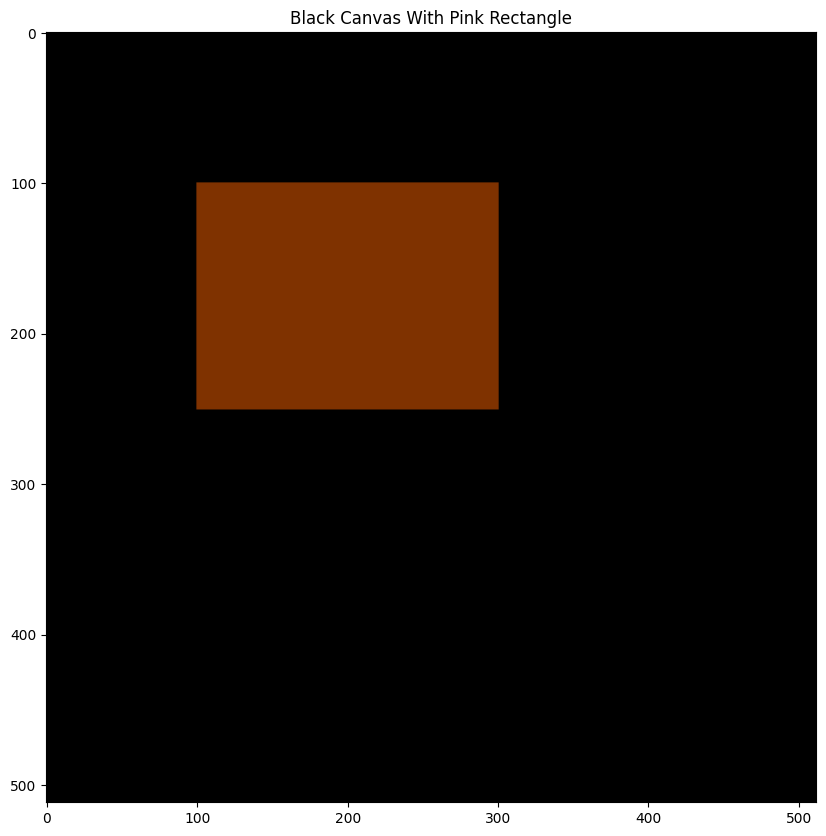

In [ ]:
# Create our black canvas again because now it has a line in it
image = np.zeros((512,512,3), np.uint8)

# Thickness - if positive. Negative thickness means that it is filled
cv2.rectangle(image, (100,100), (300,250), (0,50,127), -1)
imshow("Black Canvas With Pink Rectangle", image)

### **Now let's draw some cirlcles?**

```cv2.cirlce(image, center, radius, color, fill)```

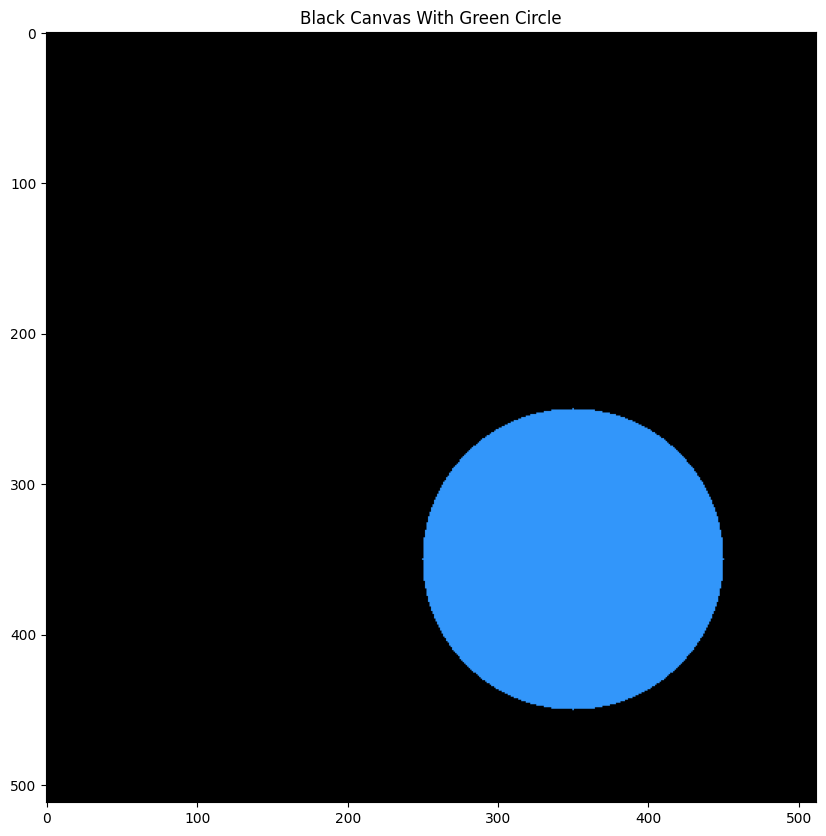

In [ ]:
image = np.zeros((512,512,3), np.uint8)

cv2.circle(image, (350, 350), 100, (250,150,50), -1)
imshow("Black Canvas With Green Circle", image)

### **Polygons**

```cv2.polylines(image, points, Closed?, color, thickness)```

if Closed = True, we join the first and last points.

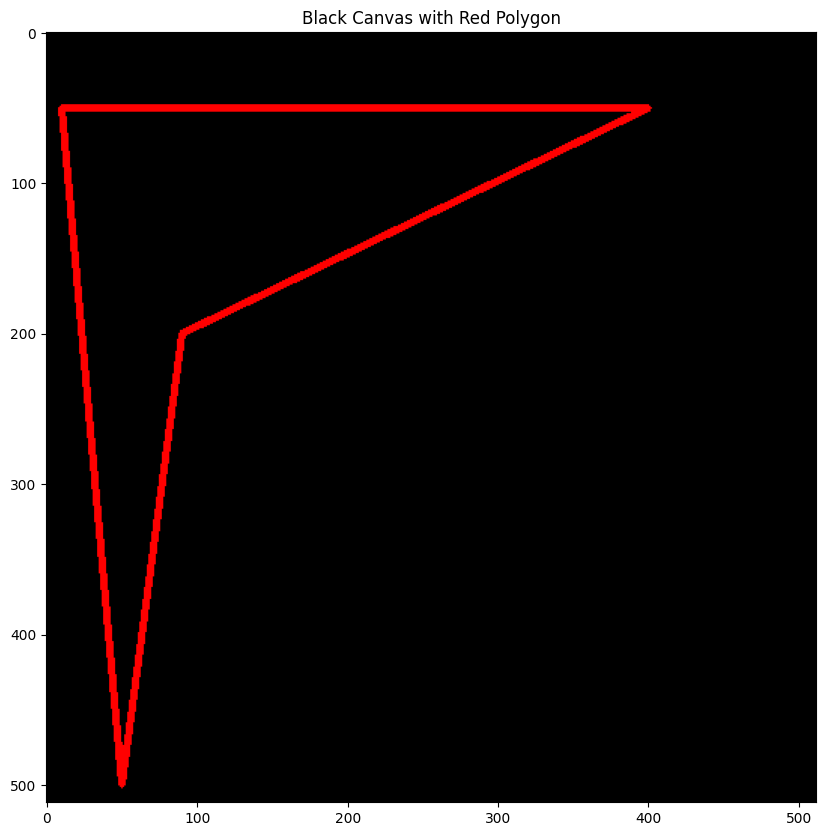

In [ ]:
image = np.zeros((512,512,3), np.uint8)

# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)

# Let's now reshape our points in form  required by polylines
pts = pts.reshape((1,-1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)
imshow("Black Canvas with Red Polygon", image)

**Note** cv2.polylines requires our data be shaped in this way:

In [ ]:
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)
pts.shape

(4, 2)

In [ ]:
pts = pts.reshape((-1,1,2))
pts.shape

(4, 1, 2)

### **And now for adding text with cv2.putText**

```cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)```

**Available Fonts**
- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

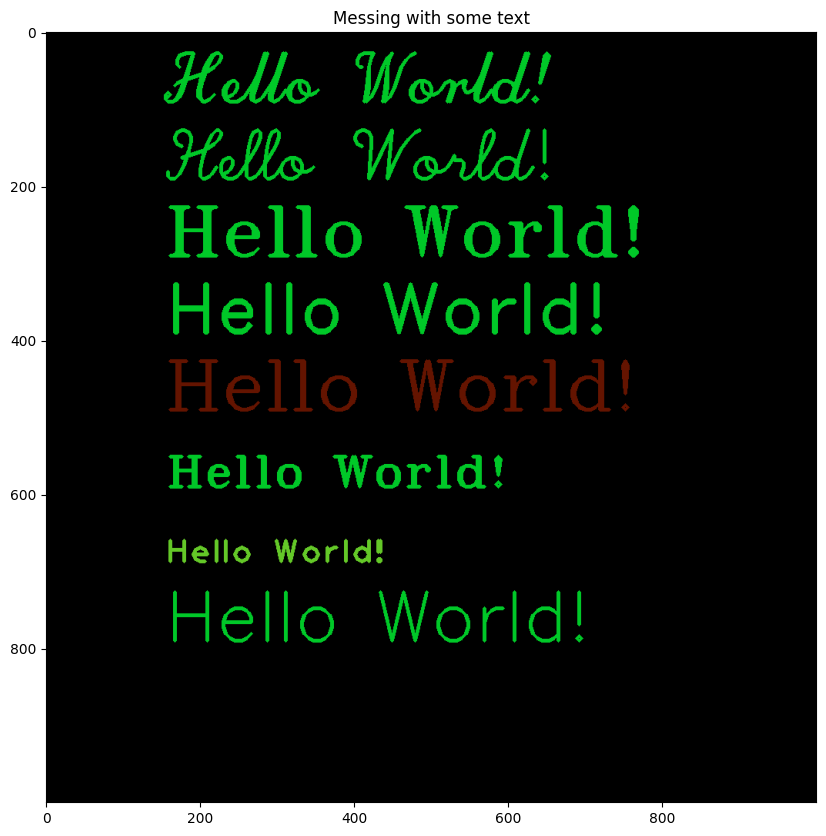

In [ ]:
image = np.zeros((1000,1000,3), np.uint8)
ourString =  'Hello World!'
cv2.putText(image, ourString, (155,90), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (40,200,0), 4)
# imshow("Messing with some text", image)
cv2.putText(image, ourString, (155,190), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 3, (40,200,0), 4)
# imshow("Messing with some text", image)
cv2.putText(image, ourString, (155,290), cv2.FONT_HERSHEY_TRIPLEX,  3, (40,200,0), 4)
# imshow("Messing with some text", image)
cv2.putText(image, ourString, (155,390), cv2.FONT_HERSHEY_DUPLEX, 3, (40,200,0), 4)
# imshow("Messing with some text", image)
cv2.putText(image, ourString, (155,490), cv2.FONT_HERSHEY_COMPLEX, 3, (0,20,100), 4)
# imshow("Messing with some text", image)
cv2.putText(image, ourString, (155,590), cv2.FONT_HERSHEY_COMPLEX_SMALL, 3, (40,200,0), 4)
# imshow("Messing with some text", image)
cv2.putText(image, ourString, (155,690), cv2.FONT_HERSHEY_PLAIN, 3, (40,200,100), 4)
# imshow("Messing with some text", image)
cv2.putText(image, ourString, (155,790), cv2.FONT_HERSHEY_SIMPLEX, 3, (40,200,0), 4)
imshow("Messing with some text", image)

In [ ]:
data = np.genfromtxt('/content/computer.csv',delimiter=',',skip_header=0,dtype=float)
print(data)
x,y=np.hsplit(data,[2])
print(x)
print(y)
x[:,0]=x[:,0]/100
y/=100
x_train=torch.tensor(x[:10],dtype=torch.float32)
y_train=torch.tensor(y[:10],dtype=torch.float32)
x_test=torch.tensor(x[10:],dtype=torch.float32)
y_test=torch.tensor(y[10:],dtype=torch.float32)
model=torch.nn.Linear(2,1)
loss_fn=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
for i in range(25):
  optimizer.zero_grad() #hosila olsa 0 chiqishi uchun
  y_hat=model(x_train)
  loss=loss_fn(y_train,y_hat)
  loss.backward()
  optimizer.step()
  print(loss.item())

[[1100.    4.  280.]
 [1600.    4.  300.]
 [1000.    8.  350.]
 [1500.   32.  500.]
 [2000.    4.  500.]
 [2200.   16.  700.]
 [2600.   32. 1050.]
 [2100.    8.  620.]
 [2400.   12.  780.]
 [3000.    8. 1000.]
 [3200.    8. 1100.]
 [1700.   16.  510.]]
[[1100.    4.]
 [1600.    4.]
 [1000.    8.]
 [1500.   32.]
 [2000.    4.]
 [2200.   16.]
 [2600.   32.]
 [2100.    8.]
 [2400.   12.]
 [3000.    8.]
 [3200.    8.]
 [1700.   16.]]
[[ 280.]
 [ 300.]
 [ 350.]
 [ 500.]
 [ 500.]
 [ 700.]
 [1050.]
 [ 620.]
 [ 780.]
 [1000.]
 [1100.]
 [ 510.]]
64.9770278930664
14.14869213104248
8.799019813537598
6.621784210205078
5.110955238342285
4.000024318695068
3.17946195602417
2.573162794113159
2.1251590251922607
1.7941124439239502
1.5494798421859741
1.368697166442871
1.2350903749465942
1.1363394260406494
1.0633418560028076
1.0093737840652466
0.9694644212722778
0.939943790435791
0.9180976152420044
0.9019237756729126
0.8899397850036621
0.881051242351532
0.8744500875473022
0.8695394396781921
0.865877151489

In [ ]:
epochs=25
for epoch in range(epochs):
  optimizer.zero_grad()
  y_hat=model(x_train)
  loss=loss_fn(y_train,y_hat)
  loss.backward()
  optimizer.step()
  print(f"loss: \t {loss.item()}")

loss: 	 0.854825496673584
loss: 	 0.8546038866043091
loss: 	 0.8544058799743652
loss: 	 0.8542273640632629
loss: 	 0.8540613055229187
loss: 	 0.8539053797721863
loss: 	 0.8537566065788269
loss: 	 0.8536137342453003
loss: 	 0.8534747958183289
loss: 	 0.8533387184143066
loss: 	 0.8532041311264038
loss: 	 0.8530721664428711
loss: 	 0.8529412150382996
loss: 	 0.8528105616569519
loss: 	 0.8526817560195923
loss: 	 0.852552592754364
loss: 	 0.8524235486984253
loss: 	 0.8522958755493164
loss: 	 0.8521677851676941
loss: 	 0.8520404100418091
loss: 	 0.8519124984741211
loss: 	 0.8517850041389465
loss: 	 0.8516573905944824
loss: 	 0.8515297174453735
loss: 	 0.8514024615287781


In [ ]:
x_test

tensor([[32.,  8.],
        [17., 16.]])

In [ ]:
y_hat=model(x_test)
print(y_hat*100)

tensor([[943.6588],
        [576.0385]], grad_fn=<MulBackward0>)


In [ ]:
from torch import nn
m=nn.Sigmoid()
n=nn.ReLU()
x=torch.tensor([-3.5],dtype=torch.float32)
print(m(x))
print(n(x))# manfiy son 0ga ,musbatni o'zi

tensor([0.0293])
tensor([0.])


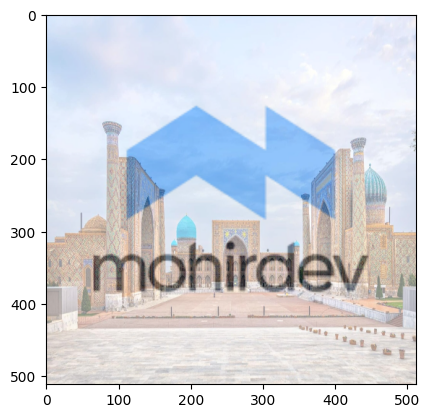

In [ ]:
logo=cv2.imread('/content/images.png')
img=cv2.imread('/content/Registon.jpeg')
logo=cv2.resize(logo,(512,512))
img=cv2.resize(img,(512,512))
logo=cv2.cvtColor(logo,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
dat=cv2.addWeighted(logo,0.5,img,0.5,4)
plt.imshow(dat)

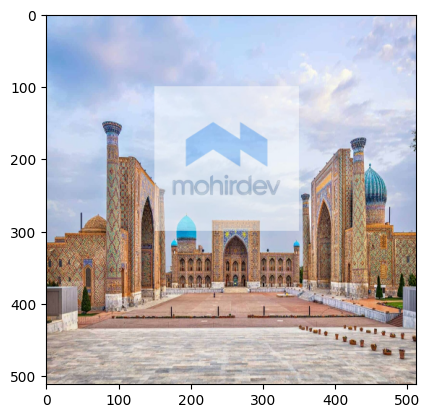

In [ ]:
import cv2
import numpy as np

# Asosiy rasmni o'qish va o'lchamini o'zgartirish
img = cv2.imread('/content/Registon.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (512, 512))

# Logoni o'qish va o'lchamini o'zgartirish
logo = cv2.imread('/content/images.png', cv2.IMREAD_UNCHANGED)
logo=cv2.cvtColor(logo,cv2.COLOR_BGR2RGB)
logo = cv2.resize(logo, (200, 200))  # Logo o'lchamini kichraytirdik

# Logoni joylashtirmoqchi bo'lgan joy koordinatalarini belgilash
x_offset = 150  # Chapdan masofasi
y_offset = 100  # Yuqoridan masofasi

# Logoni asosiy rasmga joylashtirish
y1, y2 = y_offset, y_offset + logo.shape[0]
x1, x2 = x_offset, x_offset + logo.shape[1]

alpha_s = logo[:, :,1] / 512
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    img[y1:y2, x1:x2, c] = (alpha_s * logo[:, :, c] + alpha_l * img[y1:y2, x1:x2, c])

# Natijani ko'rsatish
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

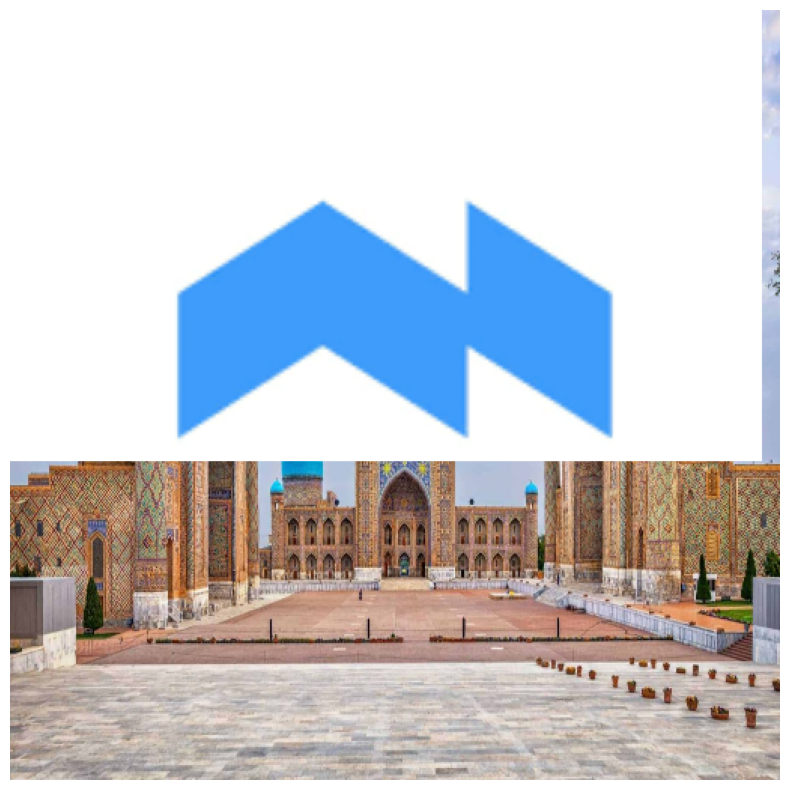

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Rasmlarni o'qish va o'lchamini o'zgartirish
logo = cv2.imread('/content/images.png')
img = cv2.imread('/content/Registon.jpeg')

# Ikkala rasmni bir xil o'lchamga keltirish
logo = cv2.resize(logo, (512, 512))
img = cv2.resize(img, (512, 512))

# BGR dan RGB ga o'tkazish
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Logoni joylashtirish uchun yangi rasm yaratish
result = img.copy()

# Logoni joylashtirish
x_start, y_start = 0, 00  # Logoning boshlanish nuqtasi
x_end, y_end = x_start + 500, y_start + 300 # Logoning tugash nuqtasi

# Slicing yordamida logoni joylashtirish
result[y_start:y_end, x_start:x_end] = logo[y_start:y_end, x_start:x_end]

# Natijani ko'rsatish
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.axis('off')
plt.show()


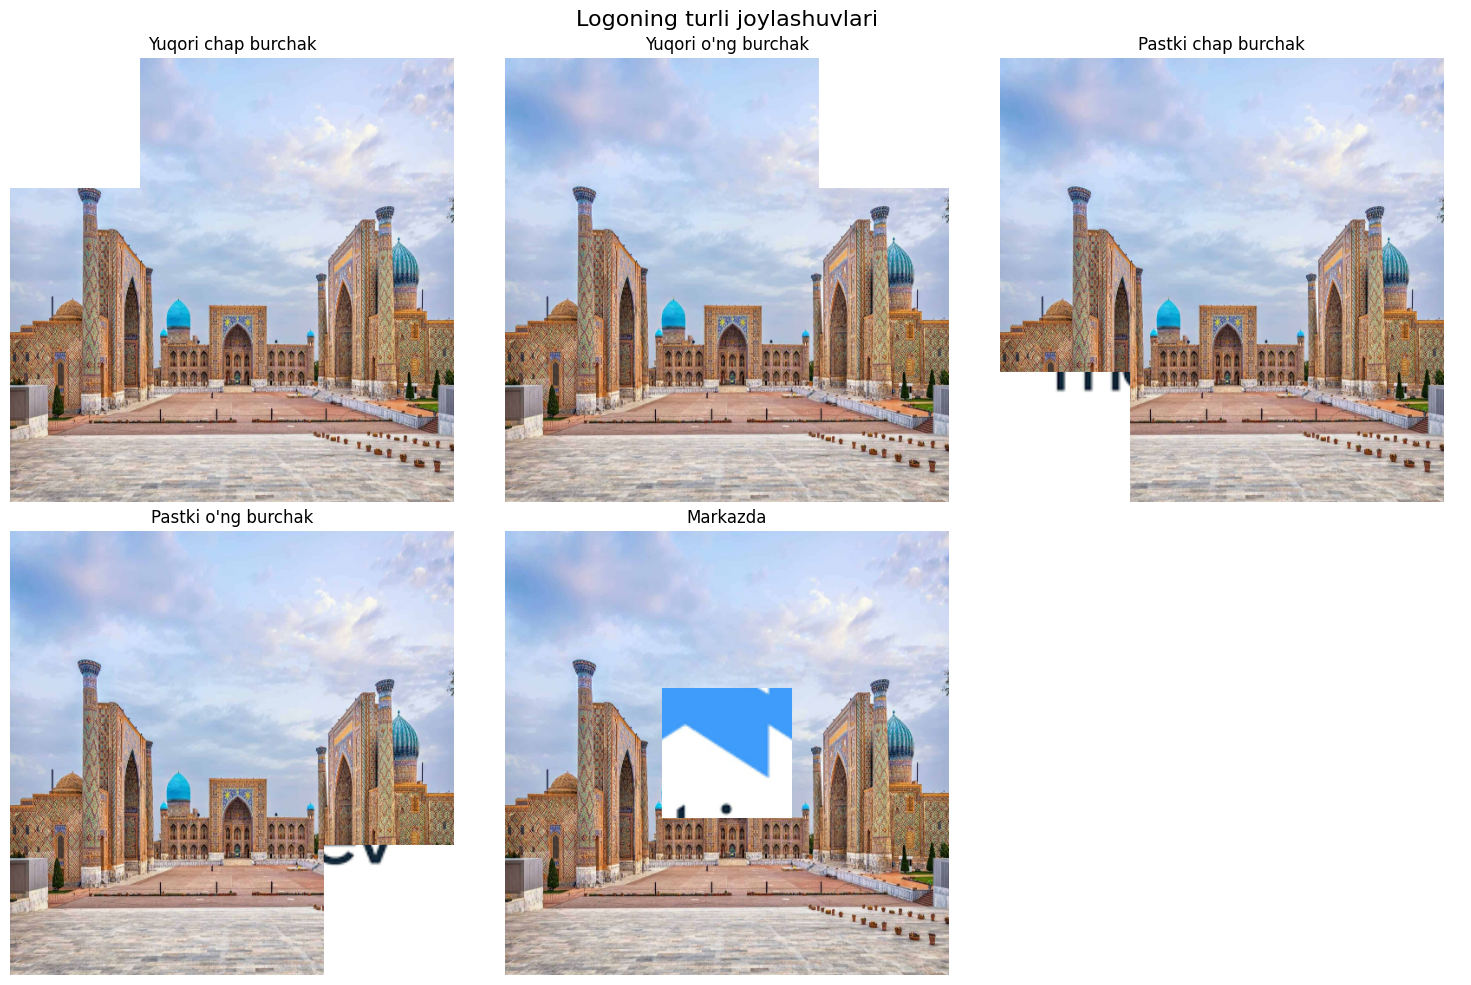

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Rasmlarni o'qish va o'lchamini o'zgartirish
logo = cv2.imread('/content/images.png')
img = cv2.imread('/content/Registon.jpeg')

# Ikkala rasmni bir xil o'lchamga keltirish
logo = cv2.resize(logo, (512, 512))
img = cv2.resize(img, (512, 512))

# BGR dan RGB ga o'tkazish
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Logoning o'lchami
logo_size = 150

# Turli joylashuvlar uchun natijalarni saqlash
results = []

# 1. Yuqori chap burchak
result1 = img.copy()
result1[0:logo_size, 0:logo_size] = logo[0:logo_size, 0:logo_size]
results.append(("Yuqori chap burchak", result1))

# 2. Yuqori o'ng burchak
result2 = img.copy()
result2[0:logo_size, -logo_size:] = logo[0:logo_size, -logo_size:]
results.append(("Yuqori o'ng burchak", result2))

# 3. Pastki chap burchak
result3 = img.copy()
result3[-logo_size:, 0:logo_size] = logo[-logo_size:, 0:logo_size]
results.append(("Pastki chap burchak", result3))

# 4. Pastki o'ng burchak
result4 = img.copy()
result4[-logo_size:, -logo_size:] = logo[-logo_size:, -logo_size:]
results.append(("Pastki o'ng burchak", result4))

# 5. Markazda
center = 512 // 2
start = center - logo_size // 2
end = start + logo_size
result5 = img.copy()
result5[start:end, start:end] = logo[start:end, start:end]
results.append(("Markazda", result5))

# Natijalarni ko'rsatish
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Logoning turli joylashuvlari", fontsize=16)

for i, (title, result) in enumerate(results):
    ax = axes[i // 3, i % 3]
    ax.imshow(result)
    ax.set_title(title)
    ax.axis('off')

axes[1, 2].axis('off')  # Ortiqcha subplot uchun
plt.tight_layout()
plt.show()

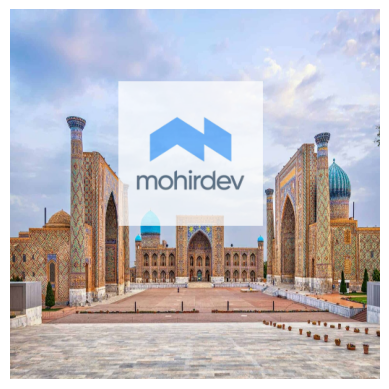

In [ ]:
# Agar logoda alpha kanali bo'lsa
if logo.shape[2] == 4:
    alpha_s = logo[:, :, 3] / 255.0
else:
    alpha_s = np.ones(logo.shape[:2]) * 0.5  # 0.5 ni xohlagan shaffoflik darajasiga o'zgartiring

alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    img[y1:y2, x1:x2, c] = (alpha_s * logo[:, :, c] + alpha_l * img[y1:y2, x1:x2, c])

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

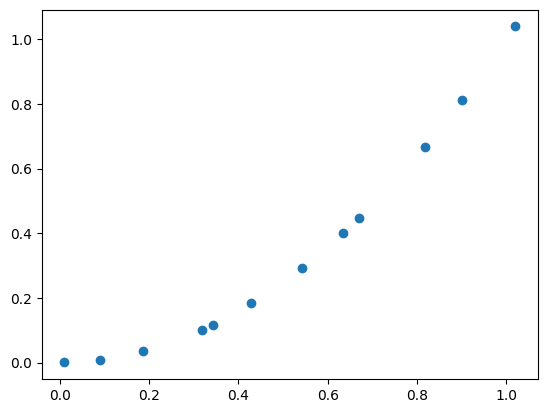

In [ ]:
x=torch.linspace(0,1,12,dtype=torch.float32)
noise=np.random.normal(0,0.05,x.shape).astype(np.float32)
x+=noise
y=x*x

x=x.reshape(-1,1)
y=y.reshape(-1,1)
plt.scatter(x,y)
plt.show()

In [ ]:
class Net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc=torch.nn.Linear(1,1)
    self.af=torch.nn.Sigmoid()
  def forward(self,x):
    return self.af(self.fc(x))

In [ ]:
model=Net()
y_hat=model(x)
y_hat

tensor([[0.6828],
        [0.6893],
        [0.6972],
        [0.7077],
        [0.7095],
        [0.7162],
        [0.7249],
        [0.7318],
        [0.7344],
        [0.7452],
        [0.7513],
        [0.7596]], grad_fn=<SigmoidBackward0>)

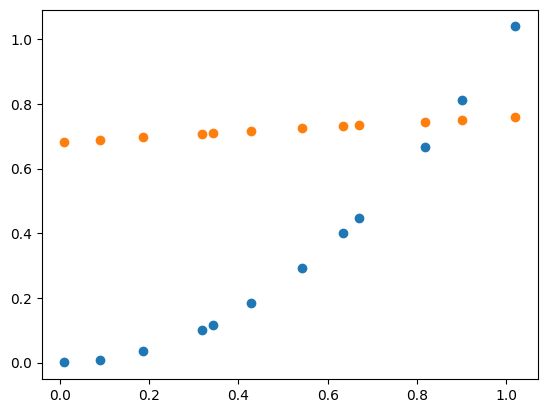

In [ ]:
plt.scatter(x,y)
plt.scatter(x,y_hat.detach().numpy())
plt.show()

In [ ]:
criterion=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)#qadam
epochs=1500
for epoch in range(epochs):
  optimizer.zero_grad()
  y_hat=model(x)
  loss=criterion(y,y_hat)
  loss.backward()
  optimizer.step()
  if epoch%10==0:
    print(f'loss:\t{loss.item()}')


loss:	0.025140851736068726
loss:	0.02299797534942627
loss:	0.021148892119526863
loss:	0.01953257992863655
loss:	0.01809314452111721
loss:	0.01680077239871025
loss:	0.015635421499609947
loss:	0.014580145478248596
loss:	0.013621757738292217
loss:	0.012749413959681988
loss:	0.011953719891607761
loss:	0.011226493865251541
loss:	0.010560636408627033
loss:	0.009949936531484127
loss:	0.009388968348503113
loss:	0.008872934617102146
loss:	0.008397583849728107
loss:	0.007959163747727871
loss:	0.007554313633590937
loss:	0.007180039305239916
loss:	0.006833658087998629
loss:	0.006512766238301992
loss:	0.006215199362486601
loss:	0.005939006339758635
loss:	0.005682433024048805
loss:	0.005443887319415808
loss:	0.005221928935497999
loss:	0.0050152442418038845
loss:	0.004822648596018553
loss:	0.004643064457923174
loss:	0.004475498106330633
loss:	0.004319059196859598
loss:	0.004172915127128363
loss:	0.004036318976432085
loss:	0.003908578306436539
loss:	0.0037890635430812836
loss:	0.0036771921440958977
lo

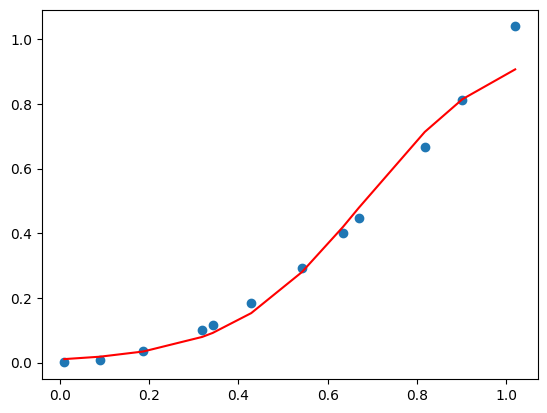

In [ ]:
pred=model(x)
plt.scatter(x,y)
plt.plot(x,pred.detach().numpy(),c='r')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=115,centers=2,n_features=2,cluster_std=0.9)
y=y.reshape(-1,1)

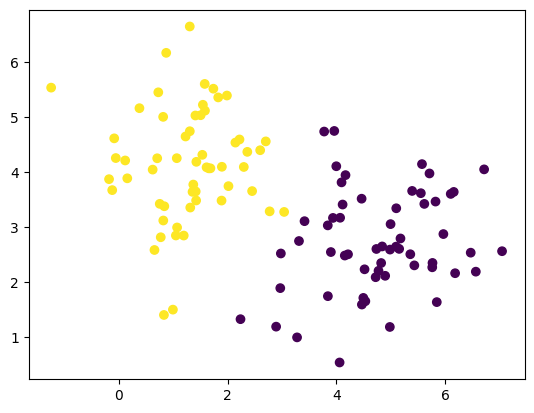

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

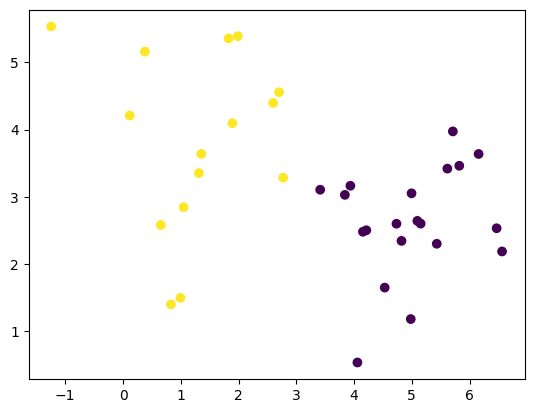

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)

In [ ]:
class Net(torch.nn.Module):
  def __init__(self,input,output):
    super().__init__()
    self.fc1=torch.nn.Linear(in_features=input,out_features=8)
    self.fc2=torch.nn.Linear(in_features=8,out_features=output)
    self.act=torch.nn.Sigmoid()
    #Activation function

  def forward(self,x):
    x=self.fc1(x)
    x=self.fc2(x)
    #out=torch.sigmoid(x)
    out=self.act(x)
    return out


In [ ]:
model=Net(2,1)
criterion=torch.nn.BCELoss()
lr=0.01
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
def train(model,optimizer,criterion,x_train,y_train,epochs=50,print_every=5):
  history_loss=[]
  history_accuracy=[]
  n=len(y_test)
  for epoch in range(epochs):
    #Clear the previous gradients to evoid accumulation
    optimizer.zero_grad()
    #Calculate predicted values
    y_hat=model(x_train)
    #Compute the loss between predicted values and actual targets
    loss=criterion(y_hat,y_train)
    #Update the total loss.
    history_loss.append(loss.item())
    #Evaluate the model on the test dataset.
    pred=model(x_test)
    acc=(sum((pred>0.5)==y_test)/n)*100
    #Update the total accuracy.
    history_accuracy.append(acc.item())
    #Compute gradients of the loss with respect to model parametrs
    loss.backward()
    #Update the model parameters using the computed gradients
    optimizer.step()
    #Print the loss and accuracy every epoch.
    if epoch%print_every==0:
      print(f'epoch {epoch}, \tloss:\t{loss.item():0.2f} \t acc: {acc.item()}')
  return history_loss,history_accuracy

In [ ]:
history_loss,history_accuracy=train(model,optimizer,criterion,x_train,y_train)
print(history_loss)

epoch 0, 	loss:	0.07 	 acc: 97.14286041259766
epoch 5, 	loss:	0.06 	 acc: 97.14286041259766
epoch 10, 	loss:	0.06 	 acc: 97.14286041259766
epoch 15, 	loss:	0.05 	 acc: 97.14286041259766
epoch 20, 	loss:	0.05 	 acc: 97.14286041259766
epoch 25, 	loss:	0.05 	 acc: 97.14286041259766
epoch 30, 	loss:	0.04 	 acc: 97.14286041259766
epoch 35, 	loss:	0.04 	 acc: 97.14286041259766
epoch 40, 	loss:	0.04 	 acc: 97.14286041259766
epoch 45, 	loss:	0.04 	 acc: 97.14286041259766
[0.06630578637123108, 0.06497015804052353, 0.06371115893125534, 0.06252269446849823, 0.0613991841673851, 0.06033559888601303, 0.05932731181383133, 0.05837012454867363, 0.05746028572320938, 0.056594282388687134, 0.05576900392770767, 0.05498157814145088, 0.054229386150836945, 0.05351002886891365, 0.052821289747953415, 0.05216117575764656, 0.05152785778045654, 0.050919629633426666, 0.05033496767282486, 0.049772441387176514, 0.04923076182603836, 0.048708684742450714, 0.04820513352751732, 0.04771904647350311, 0.04724949225783348, 0

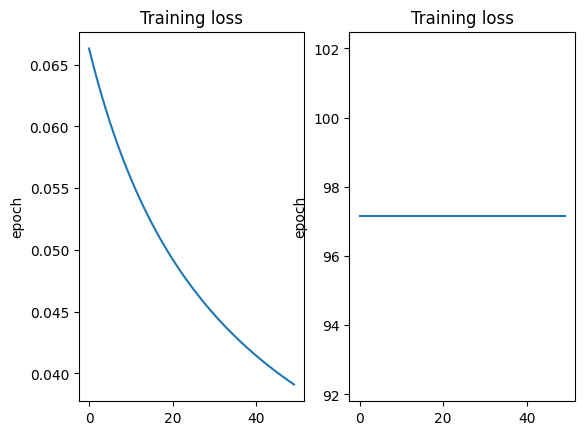

In [ ]:
fig,ax=plt.subplots(1,2)
ax[0].plot(history_loss)
ax[1].plot(history_accuracy)
ax[0].set_title('Training loss')
ax[1].set_title('Training loss')
ax[1].set_ylabel('epoch')
ax[0].set_ylabel('epoch')
plt.show()

Text(0.5, 1.0, 'Training loss')

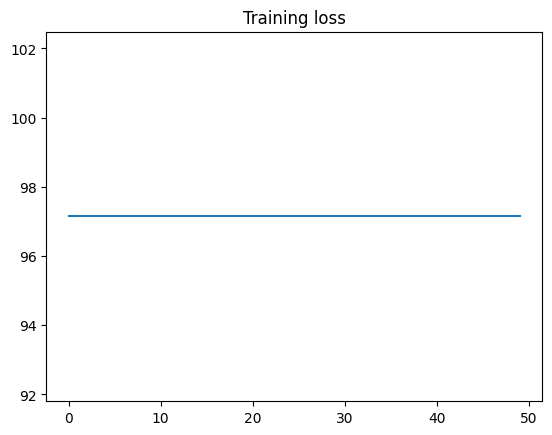

In [ ]:
 plt.plot(history_accuracy)
plt.title('Training loss')

In [ ]:
x,y=make_blobs(n_samples=115,centers=2,n_features=2,)
y=y.reshape(-1,1)

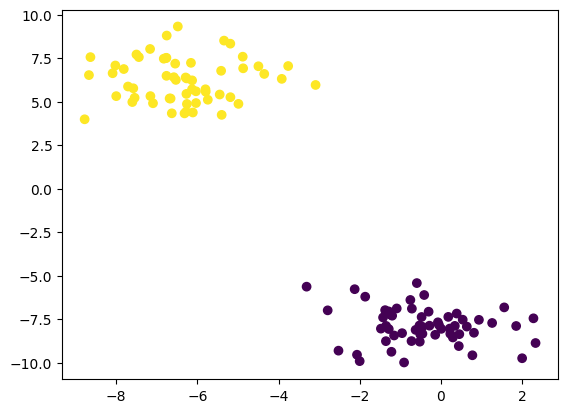

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
!wget https://pjreddie.com/media/files/mnist_train.csv

--2024-07-23 10:23:32--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/csv]
Saving to: ‘mnist_train.csv’

mnist_train.csv     100%[===================>] 104.50M  28.3MB/s    in 4.2s    

2024-07-23 10:23:37 (25.2 MB/s) - ‘mnist_train.csv’ saved [109575994/109575994]

